<a href="https://colab.research.google.com/github/NemesisCrociata/Production-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
Nemesis Crociata
## Project Overview
- An overview of products and outlets for our client, a major grocer retailer, that play crucial roles in increasing sales.

## Load and Inspect Data

- Relevant packages are imported.
- The data set is uploaded as a Pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

file = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

df = pd.read_csv(file)

### Brief overview:

In [2]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Dictionary:

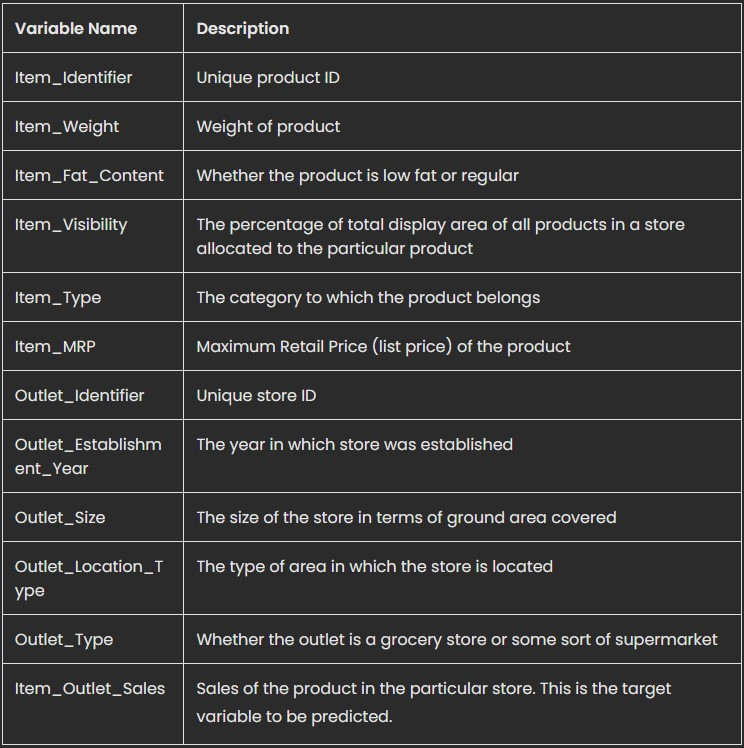

## Clean Data

**There are 8,523 rows and 12 columns.**

- To start, some columns are renamed for clarity.

In [5]:
rename_dict = {'Item_Identifier': 'Item_ID',
               'Item_MRP': 'Maximum_Retail_Price',
               'Outlet_Location_Type': 'Location_Type'}

df = df.rename(rename_dict, axis=1)
df.head()

,Item_ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Checking for unnecessary columns:

- Unique values are shown for each column.

In [6]:
unique_vals = df.nunique()
unique_vals

Item_ID                      1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Maximum_Retail_Price         5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Location_Type                   3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

- The percentage of unique values are calculated.

In [7]:
unique_vals / len(df) * 100

Item_ID                      18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Maximum_Retail_Price         69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Location_Type                 0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

**Since there are no columns with 100% unique values, no columns are removed.**


### Checking for duplicated rows

In [8]:
df.duplicated().sum()

0

**Since there are no duplicated rows in the data set, no rows are removed.**

### Checking for column data types

In [28]:
df.dtypes

Item_ID                       object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Maximum_Retail_Price         float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Location_Type                 object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

*Columns that require further inspection are 'Outlet_Location_Type' and 'Outlet_Type'.*

- <u>Outlet Location Type</u>, renamed 'Location_Type', is defined as "[t]he type of area in which the store is located".
  - Although the values could be reduced to their numerical value, this isn't appropriate for the data.

- <u>Outlet Type</u> is defined as "[w]hether the outlet is a grocery store or some sort of supermarket".
  - Again, although the values can be reduced to a numerical value, this isn't appropriate for the data.


**No column data types need to be adjusted.**

### Checking for consistent values

- The value counts from each column are pulled using a for loop.

In [29]:
for col in df.columns:
  print(f'Value Counts for {col}:')
  print(df[col].value_counts ())
  print('\n')

Value Counts for Item_ID:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_ID, Length: 1559, dtype: int64


Value Counts for Item_Weight:
12.150    105
17.600    102
11.800     90
13.650     89
15.100     86
         ... 
5.675       2
8.800       2
6.405       2
6.775       2
5.210       2
Name: Item_Weight, Length: 416, dtype: int64


Value Counts for Item_Fat_Content:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Visibility:
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value Counts for Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned               

- We can see there are values in 'Item_Fat_Content' that can be renamed and merged.
  - This is accomplished using the .replace() method with a short dictionary inserted.

In [30]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Object values are now consistent.**

### Checking for null values

- A null value count is pulled from the data set.

In [12]:
df.isna().sum()

Item_ID                         0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Maximum_Retail_Price            0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Location_Type                   0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- We will use missingno to visualize null values in the data set.

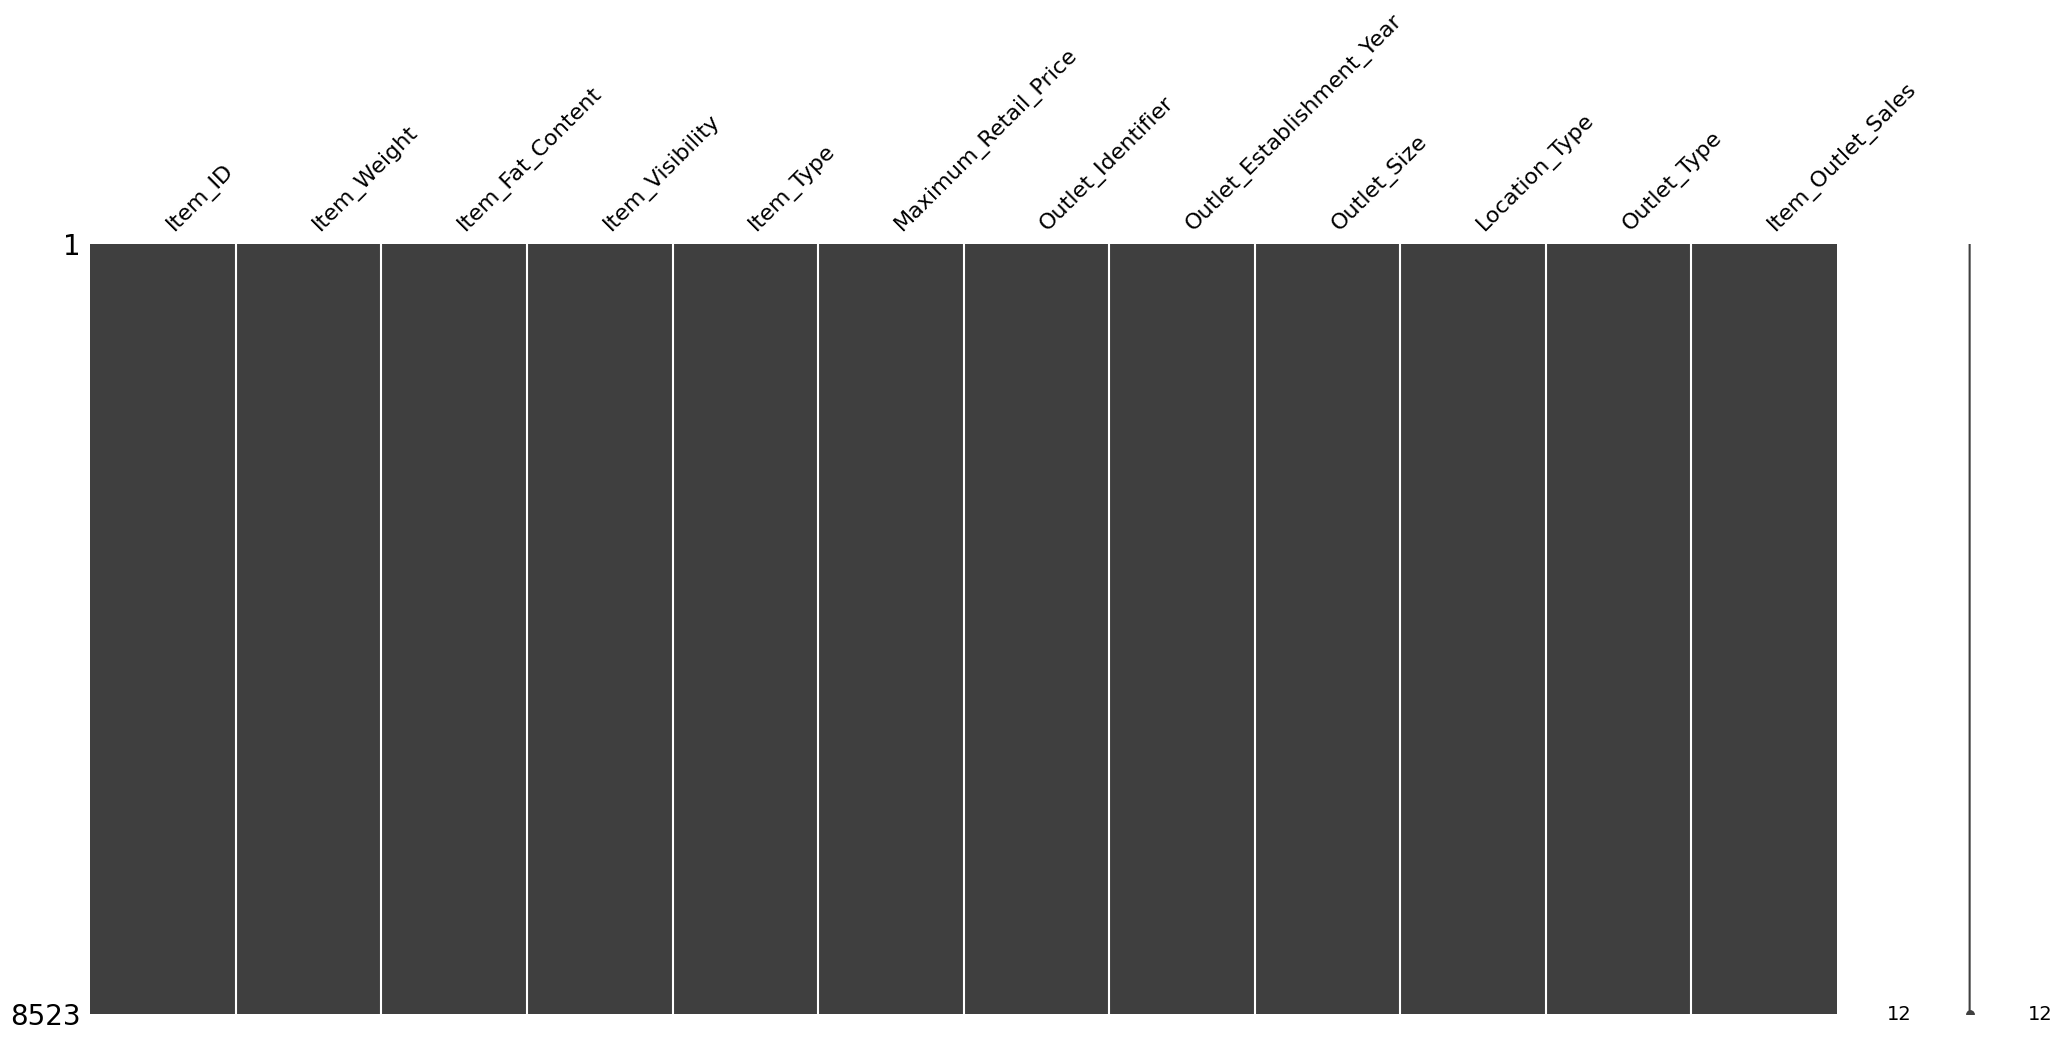

In [31]:
msno.matrix(df);

#### Replacing object-type null values

- Since 'Outlet_Size' is an object-type Series, null values are replaced with the term 'MISSING'.

In [32]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].isna().sum()

0

- Now, 'MISSING' is a new value.

In [33]:
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

**Object-type null values have been filled.**

#### Replacing numerical-type null values

- Next, null values in 'Item_Weight' must be replaced.  

  - The head and tail of the data set show that each 'Item_ID' value has the same 'Item_Weight' value.
  - To fill the null values, a dictionary will be created.
  - Known 'Item_ID' values and their corresponding 'Item_Weight' values will be the keys and values of the dictionary.  

- First, null values are removed from 'Item_Weight'.
  - This is isolated to the variable weight_nulls_gone.

In [35]:
null_weight = df['Item_Weight'].isna()
weight_nulls_gone = df[null_weight == False]
weight_nulls_gone

,Item_ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


- From this variable, duplicates of 'Item_ID' values are dropped.

In [17]:
weight_nulls_gone = weight_nulls_gone.drop_duplicates(subset='Item_ID')
weight_nulls_gone

,Item_ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
7298,NCW05,20.250,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388
7373,FDS09,8.895,Regular,0.081547,Snack Foods,49.8008,OUT017,2007,MISSING,Tier 2,Supermarket Type1,759.0120
7421,FDU43,19.350,Regular,0.000000,Fruits and Vegetables,238.6564,OUT013,1987,High,Tier 3,Supermarket Type1,3575.3460
7944,FDO49,10.600,Regular,0.033052,Breakfast,49.7008,OUT046,1997,Small,Tier 1,Supermarket Type1,961.4152


- The 'Item_ID' and 'Item_Weight' columns are transformed into lists.

In [42]:
id_list = list(weight_nulls_gone['Item_ID'])
weight_list = list(weight_nulls_gone['Item_Weight'])

print(id_list)
print(weight_list)

['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', 'FDP36', 'FDO10', 'FDP10', 'FDH17', 'FDU28', 'FDY07', 'FDA03', 'FDX32', 'FDS46', 'FDF32', 'FDP49', 'NCB42', 'FDP49', 'DRI11', 'FDU02', 'FDN22', 'FDW12', 'NCB30', 'FDC37', 'FDR28', 'NCD06', 'FDV10', 'DRJ59', 'FDE51', 'FDC14', 'FDV38', 'NCS17', 'FDP33', 'FDO23', 'DRH01', 'NCX29', 'FDV20', 'DRZ11', 'FDX10', 'FDB34', 'FDU02', 'FDK43', 'FDA46', 'FDC02', 'FDL50', 'FDM39', 'NCP05', 'FDV49', 'FDL12', 'FDS02', 'NCL17', 'FDM40', 'FDR13', 'FDA43', 'NCP18', 'FDK21', 'NCX54', 'DRK35', 'FDY21', 'FDI26', 'FDM20', 'FDV27', 'FDF09', 'FDY40', 'FDY45', 'FDC46', 'FDH19', 'FDZ03', 'DRH37', 'NCI17', 'FDJ58', 'FDL12', 'FDH35', 'FDG02', 'NCZ18', 'FDC29', 'FDQ10', 'FDN48', 'FDL04', 'FDV25', 'FDD58', 'FDN04', 'FDV45', 'NCL18', 'FDR12', 'FDG20', 'FDZ55', 'FDQ49', 'FDN33', 'FDN27', 'FDW20', 'DRG27', 'DRI25', 'FDA44', 'NCR17', 'FDU04', 'FDF41', 'FDB56', 'NCP18', 'FDB56', 'FDT28', 'FDD10', 'FDW57', 'DRB48', 'FDP09', 'FDH14', 'FDA47', 'FDG12', 'DRE60', 'DRK49', 'FDD03', 

- The lists are zipped together in order of future keys and values.
- The zipped lists are turned into a dictionary.
  - The dictionary is printed to show the final result.

In [43]:
zipped_list = zip(id_list, weight_list)
id_weight_list = dict(zipped_list)
print(id_weight_list)

{'FDA15': 9.3, 'DRC01': 5.92, 'FDN15': 17.5, 'FDX07': 19.2, 'NCD19': 8.93, 'FDP36': 10.395, 'FDO10': 13.65, 'FDP10': 19.0, 'FDH17': 16.2, 'FDU28': 19.2, 'FDY07': 11.8, 'FDA03': 18.5, 'FDX32': 15.1, 'FDS46': 17.6, 'FDF32': 16.35, 'FDP49': 9.0, 'NCB42': 11.8, 'DRI11': 8.26, 'FDU02': 13.35, 'FDN22': 18.85, 'FDW12': 8.315, 'NCB30': 14.6, 'FDC37': 15.5, 'FDR28': 13.85, 'NCD06': 13.0, 'FDV10': 7.645, 'DRJ59': 11.65, 'FDE51': 5.925, 'FDC14': 14.5, 'FDV38': 19.25, 'NCS17': 18.6, 'FDP33': 18.7, 'FDO23': 17.85, 'DRH01': 17.5, 'NCX29': 10.0, 'FDV20': 20.2, 'DRZ11': 8.85, 'FDX10': 6.385, 'FDB34': 15.25, 'FDK43': 9.8, 'FDA46': 13.6, 'FDC02': 21.35, 'FDL50': 12.15, 'FDM39': 6.42, 'NCP05': 19.6, 'FDV49': 10.0, 'FDL12': 15.85, 'FDS02': 10.195, 'NCL17': 7.39, 'FDM40': 10.195, 'FDR13': 9.895, 'FDA43': 10.895, 'NCP18': 12.15, 'FDK21': 7.905, 'NCX54': 9.195, 'DRK35': 8.365, 'FDY21': 15.1, 'FDI26': 5.94, 'FDM20': 10.0, 'FDV27': 7.97, 'FDF09': 6.215, 'FDY40': 15.5, 'FDY45': 17.5, 'FDC46': 17.7, 'FDH19': 19.

- The original 'Item_Weight' Series' nulls are filled using the .map() method [as shown by jezrael on Stack Overflow](https://stackoverflow.com/questions/71205742/filling-empty-rows-with-dictionary-values-via-for-loop-pandas).

- By pulling the data frame's columns 'Item_ID' and 'Item_Weight' while sorting by 'Item_ID', we can see that the occasional null values have now been filled.

In [44]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_ID'].map(id_weight_list))
df[['Item_ID', 'Item_Weight']].sort_values('Item_ID')

,Item_ID,Item_Weight
8043,DRA12,11.60
118,DRA12,11.60
1693,DRA12,11.60
1197,DRA12,11.60
1245,DRA12,11.60
...,...,...
7926,NCZ54,14.65
214,NCZ54,14.65
1896,NCZ54,14.65
7166,NCZ54,14.65


- The remaining null values are pulled.

In [21]:
df['Item_Weight'].isna().sum()

4

- Because there are only four null values remaining, we can assume there are no corresponding values in the data set.
- After viewing the remaining null values within the data frame, we can fill the remaining nulls with improbable numerical placeholders.

In [22]:
remaining_weight_nulls = df.isna().any(axis=1)
df[remaining_weight_nulls]

,Item_ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- The maximum value from 'Item_Weight' is pulled.

In [23]:
max(df['Item_Weight'])

21.35

- Missing null values in 'Item_Weight' are filled using 999, a number much higher than the Series' previous maximum value.

In [24]:
df['Item_Weight'] = df['Item_Weight'].fillna(999)
df['Item_Weight'].isna().sum()

0

- The data set is checked one more time for any remaining null values.

In [25]:
df.isna().sum()

Item_ID                      0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Maximum_Retail_Price         0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Location_Type                0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**All null values have been addressed.**

### Creating summaries for numerical columns

- Numerical columns are isolated to the variable numerical_cols.

In [45]:
numerical_cols = df.select_dtypes('number').columns
numerical_cols

Index(['Item_Weight', 'Item_Visibility', 'Maximum_Retail_Price',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

- A for loop is created to print a description (.describe()) of each numerical column.

In [47]:
for col in numerical_cols:
  print(f'Summary Statistics of {col}:')
  print(df[col].describe())
  print('\n')

Summary Statistics of Item_Weight:
count    8523.000000
mean       13.338227
std        21.858640
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max       999.000000
Name: Item_Weight, dtype: float64


Summary Statistics of Item_Visibility:
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Summary Statistics of Maximum_Retail_Price:
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Maximum_Retail_Price, dtype: float64


Summary Statistics of Outlet_Establishment_Year:
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: 

## Exploratory Data Analysis

## Explanatory Data Analysis